# **Análise Univariada**

**Descrição:**
**Vamos aplicar os conceitos aprendidos**
1. carregar o arquivo Pokémon em Python. Realizar uma análise univariada sobre o arquivo.

**Aspectos a serem incluídos na atividade:**
O código deve ser feito em um notebook e deve ser testado.

### **Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

from seaborn import violinplot
from seaborn import boxplot
from seaborn import distplot

### **Importando o arquivos Pokémon para realizar a análise univariada**

In [2]:
pokemon_df = pd.read_csv(
    'https://raw.githubusercontent.com/jherfson/curso-coderhouse/main/aula10/Pokemon.csv',
    sep=',',
    index_col=False
)
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
pokemon_df = pokemon_df.drop(columns=['#'])
pokemon_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### **Dimensão da baese**

In [4]:
pokemon_df.shape

(800, 12)

### **Tipos de dados**

In [5]:
pokemon_df.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

### **Total de registros**

In [6]:
pokemon_df.count()

Name          800
Type 1        800
Type 2        414
Total         800
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

### **Detalhes da base**

In [7]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


### **Medidas estatísticas**

In [8]:
pokemon_df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### **Medidas estatística transpose**

In [9]:
pokemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.0,6.0


## **Análise do HP**

In [10]:
pokemon_df.HP.describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

<Axes: xlabel='HP'>

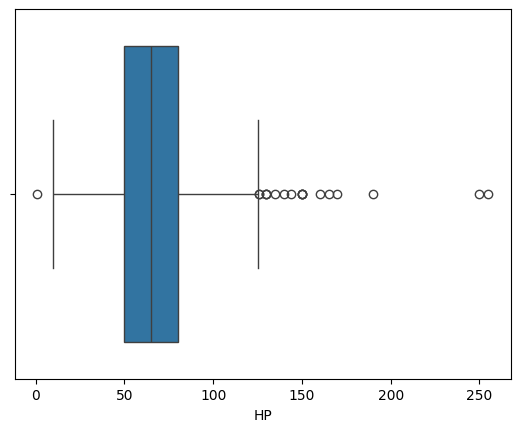

In [12]:
boxplot(pokemon_df.HP, orient='h')

In [13]:
pokemon_df.HP

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

<Axes: xlabel='HP'>

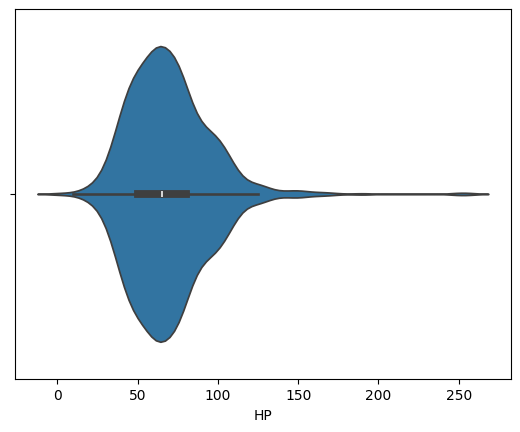

In [15]:
violinplot(pokemon_df, x='HP')

<Axes: xlabel='HP'>

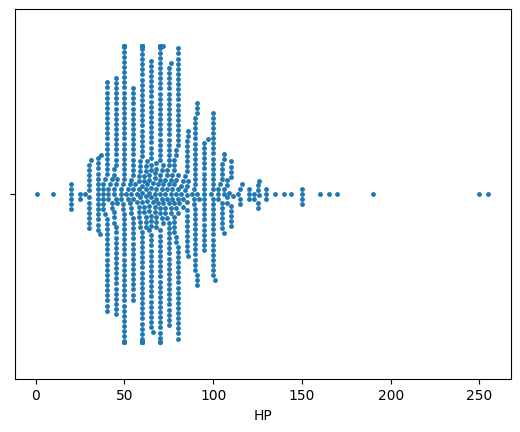

In [22]:
sns.swarmplot(pokemon_df, x='HP', size=3.5)

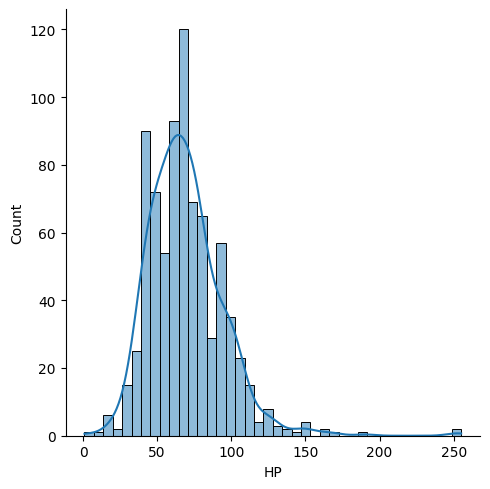

In [24]:
sns.displot(pokemon_df.HP, kde=True)

## **Análise do Attack**

In [16]:
pokemon_df.Attack.describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

<Axes: xlabel='Attack'>

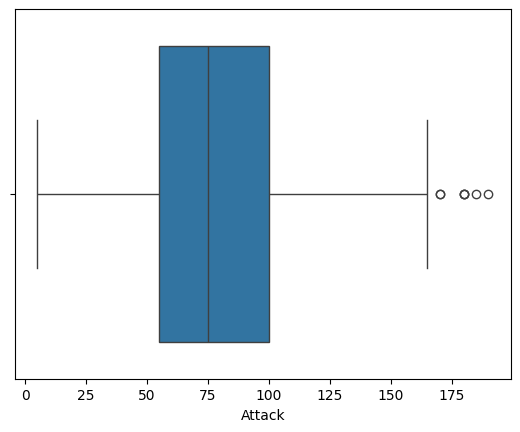

In [23]:
boxplot(pokemon_df.Attack, orient='h')

<Axes: xlabel='Attack'>

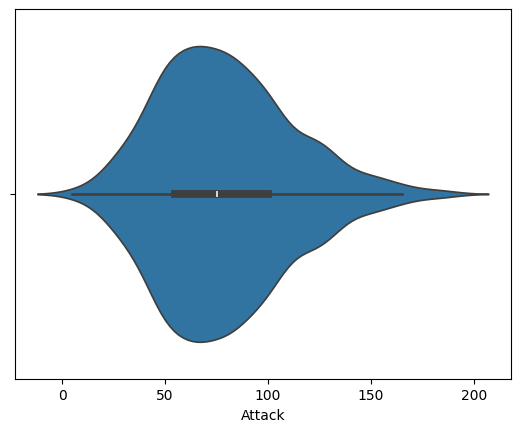

In [25]:
violinplot(pokemon_df, x='Attack')

<Axes: xlabel='Attack'>

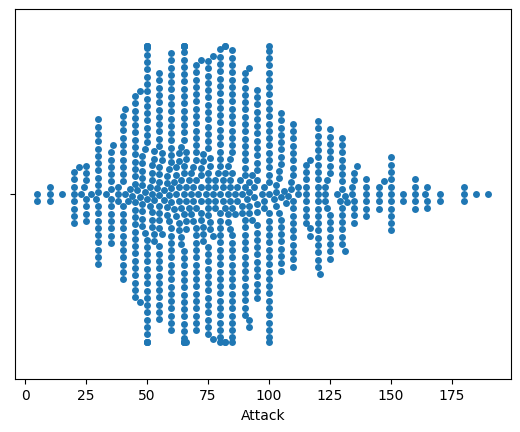

In [26]:
sns.swarmplot(pokemon_df, x='Attack')

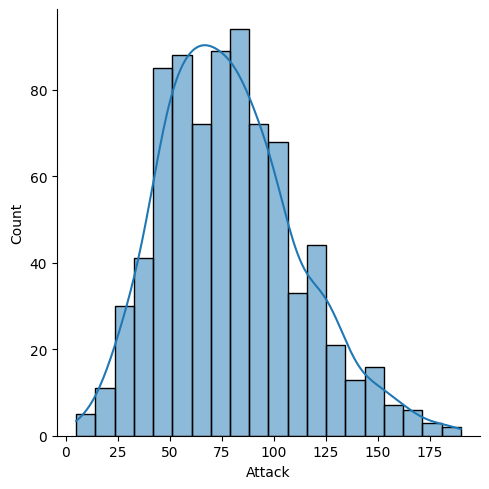

In [29]:
sns.displot(pokemon_df, x='Attack', kde=True)

## **Análise da Defense**

In [31]:
pokemon_df.Defense.describe()

count    800.000000
mean      73.842500
std       31.183501
min        5.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      230.000000
Name: Defense, dtype: float64

<Axes: xlabel='Defense'>

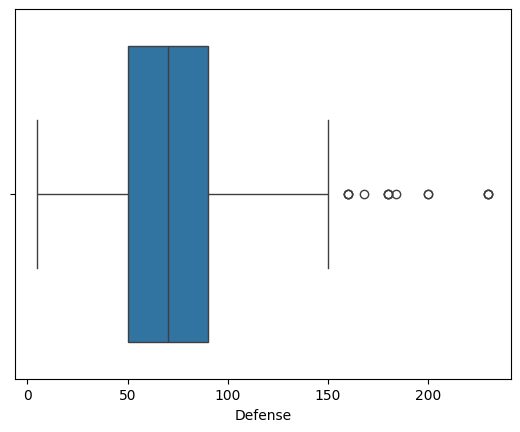

In [33]:
boxplot(pokemon_df.Defense, orient='h')

<Axes: xlabel='Defense'>

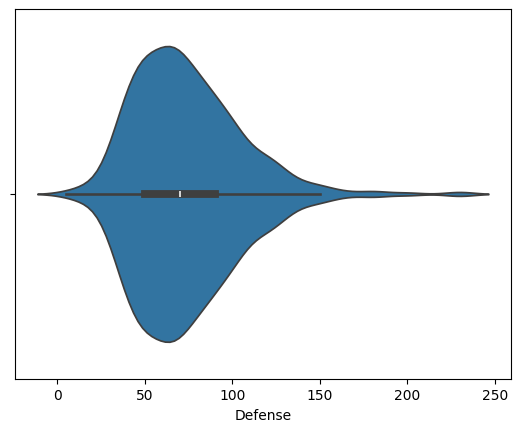

In [34]:
violinplot(pokemon_df, x='Defense')

<Axes: xlabel='Defense'>

/home/jherfson/anaconda3/envs/coderhouse/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


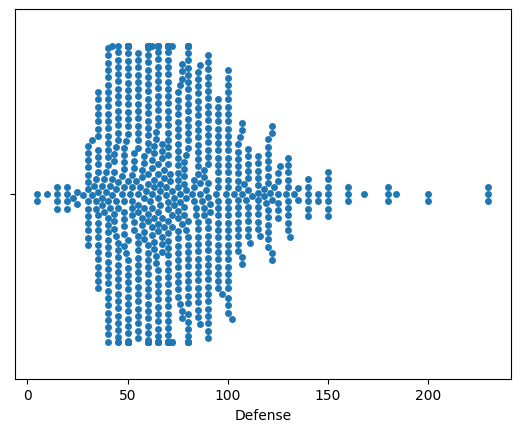

In [35]:
sns.swarmplot(pokemon_df, x='Defense')

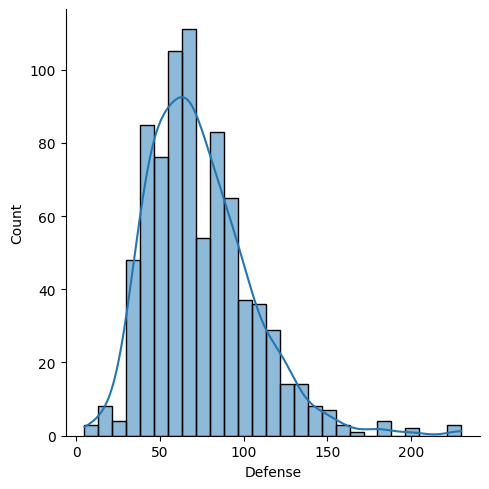

In [36]:
sns.displot(pokemon_df, x='Defense', kde=True)

## **Análise do Speed**

In [43]:
pokemon_df.Speed.describe()

count    800.000000
mean      68.277500
std       29.060474
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

<Axes: xlabel='Speed'>

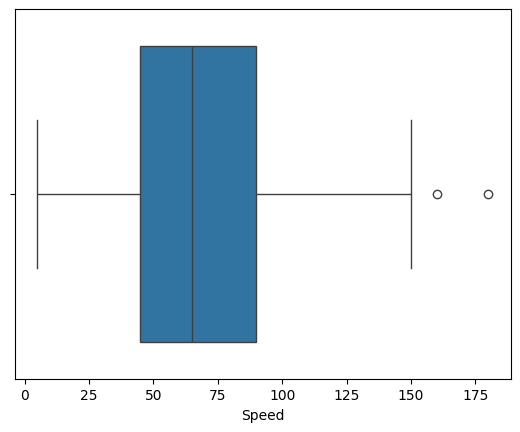

In [44]:
boxplot(pokemon_df.Speed, orient='h')

<Axes: xlabel='Speed'>

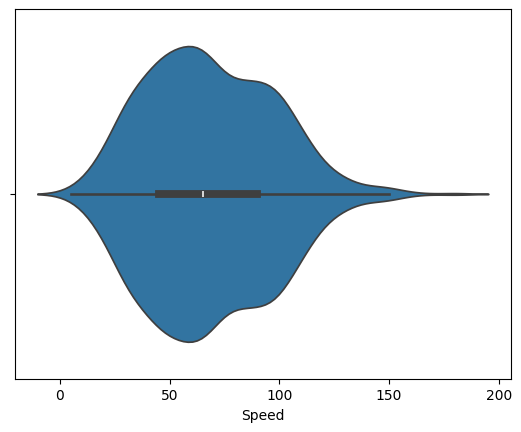

In [45]:
violinplot(pokemon_df, x='Speed')